In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import LogNorm

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import SGDClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline

from sklearn.mixture import GaussianMixture




Pomimo wielu prób ze stworzeniem danych na rozdzielnych plikach (Mod16Ex4_FAIL), testując rozwiązanie na gotowych danych z sklearn postanowiłem "ręcznie" stworzyć w Excelu plik zawerający dane dołaczone do zadania.

Zauważyłem również proble (przynajmniej ja mam) na testowianie całego zbioru. A wiec na potrzebyu tego zadania bede trenował 2 kolumny z bazy.

In [2]:
dt = pd.read_excel('sam.xlsx')
dt

,dane_1,dane_2,dane_3,dane_4,dane_5,dane_6,dane_7,dane_8,dane_9,dane_10,...,dane_553,dane_554,dane_555,dane_556,dane_557,dane_558,dane_559,dane_560,dane_561,label
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,2
10295,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,2
10296,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,2
10297,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,2


In [3]:
features = ['dane_8', 'dane_345']
target = ['label']

X, y = dt[features], dt[target]

# Clustering

KMeans

In [4]:
clf = KMeans(n_clusters=6)

y_pred = clf.fit_predict(X)
print(y_pred)

[1 1 1 ... 4 3 4]


In [5]:
def plot_data(X):
    plt.plot(dt['dane_8'], dt['dane_345'], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
  
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # rysowanie konturów granic 
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    
    # rysowanie danych
    plt.plot(dt['dane_8'], dt['dane_345'], 'k.', markersize=2)
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

C:\Users\mateu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


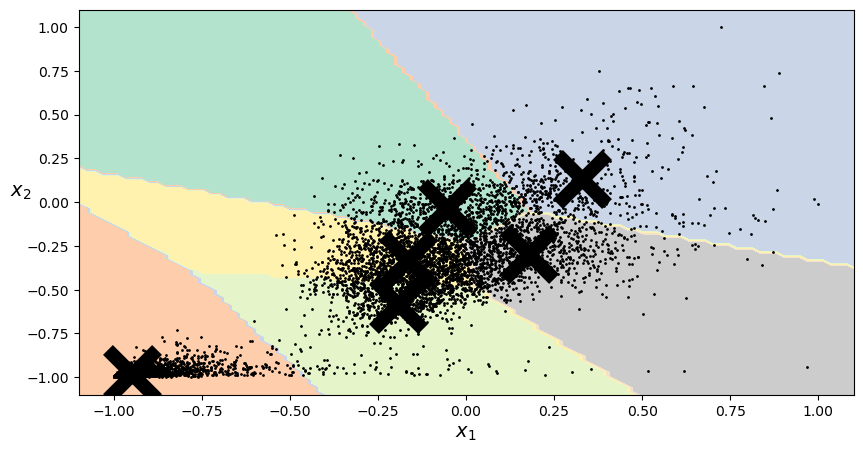

In [6]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(clf, X)
plt.show()

In [7]:
clf.cluster_centers_

array([[-0.05335066, -0.03506484],
       [-0.94910345, -0.98268259],
       [ 0.32851249,  0.13357091],
       [-0.19358215, -0.57964731],
       [-0.16503209, -0.33093735],
       [ 0.18015178, -0.29861788]])

In [8]:
clf_1 = KMeans(n_clusters=6, max_iter=1, init="random", n_init=1, algorithm="full", random_state=4)
clf_2 = KMeans(n_clusters=6, max_iter=2, init="random", n_init=1, algorithm="full", random_state=4)
clf_3 = KMeans(n_clusters=6, max_iter=3, init="random", n_init=1, algorithm="full", random_state=4)
clf_300 = KMeans(n_clusters=6, max_iter=300, init="random", n_init=1, algorithm="full", random_state=4)
clf_1.fit(X)
clf_2.fit(X)
clf_3.fit(X)
clf_300.fit(X)

KMeans(algorithm='full', init='random', n_clusters=6, n_init=1, random_state=4)

C:\Users\mateu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\mateu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\mateu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\mateu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


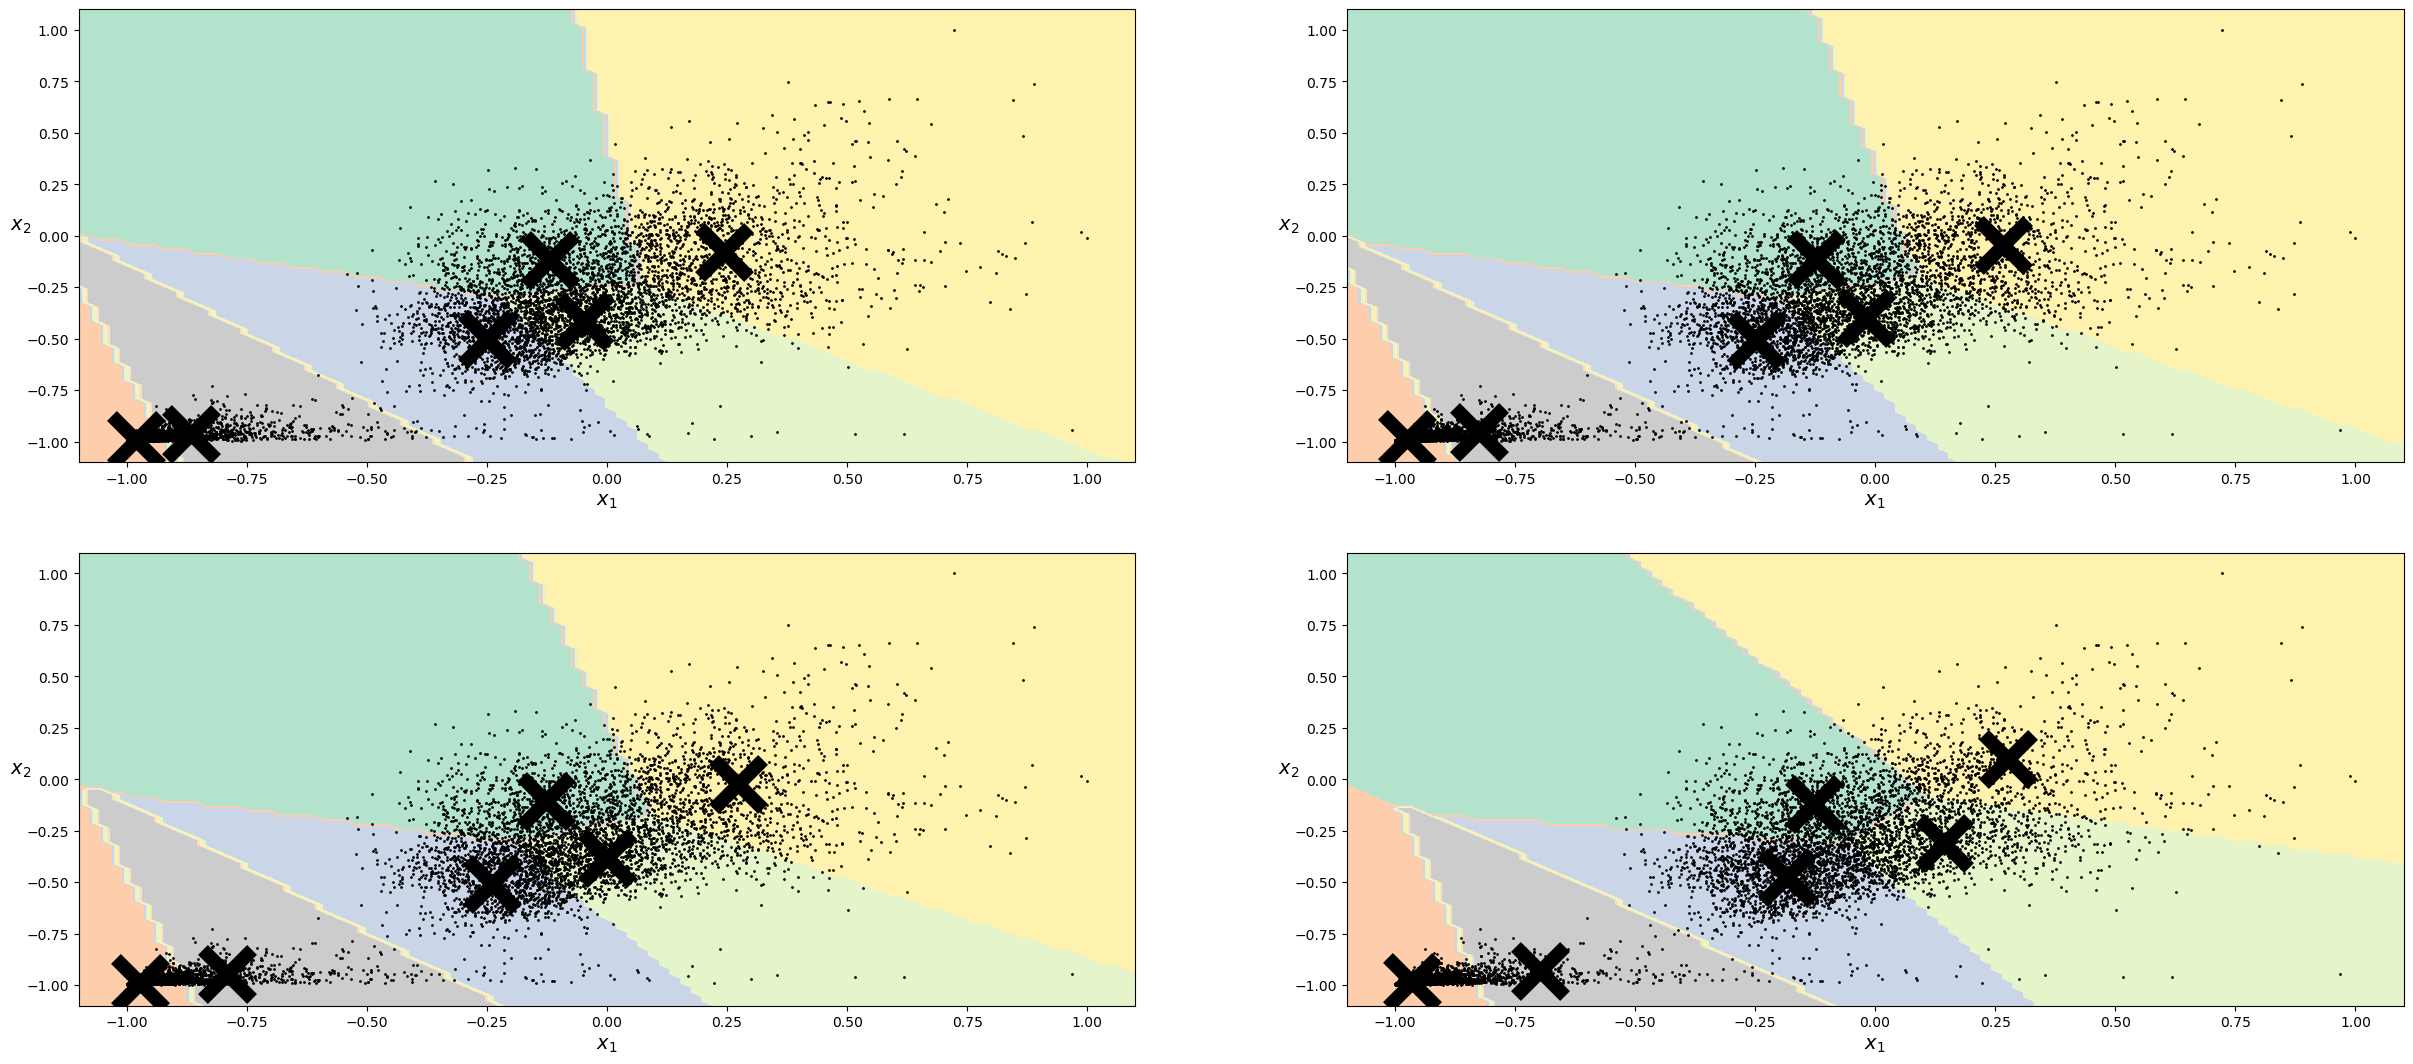

In [9]:
plt.figure(figsize=(30, 20))

plt.subplot(321)
plot_decision_boundaries(clf_1, X)

plt.subplot(322)
plot_decision_boundaries(clf_2, X)

plt.subplot(323)
plot_decision_boundaries(clf_3, X)

plt.subplot(324)
plot_decision_boundaries(clf_300, X)
plt.show()

Algorytm z każdym krokiem poprawia swoje działanie

Skalowanie danych

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'X_train' is not defined

Użycie metody kroswalidacji do sprawdzenia działania modelu na różnych podziałach

In [ ]:
clf = SGDClassifier(random_state=1)

cv_score = cross_val_score(clf, X, y, cv=5)
print("wynik kroswalidacji: ", cv_score)
print("średni wynik wszystkich foldów: ", cv_score.mean())

Dobranie ilości klastrów

In [ ]:
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(X)
    for k in range(2, 15)
]

In [ ]:
import matplotlib.pyplot as plt
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 15), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

Preprocessing danych z użyciem KMeans

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2) # podział na dane treningowe i testowe

log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2) # użycie klasyfikatora LogisticRegression
log_reg.fit(X_train, y_train)
print("Bez KMeans :", log_reg.score(X_test, y_test))

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=40, random_state=2)), # ilość klastrów znacznie większa od ilości klas w zbiorze
    ("log_reg", LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)),
])
pipeline.fit(X_train, y_train)
print("Z KMeans :", pipeline.score(X_test, y_test))

Wynik nieznacząco się poprawił

# DBSCAN

In [ ]:
features = ['dane_8', 'dane_345']
target = ['label']

X, y = dt[features], dt[target]

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=6)
dbscan.fit(X)

dbscan_2 = DBSCAN(eps=0.3, min_samples=6)
dbscan_2.fit(X)

In [ ]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [ ]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
plot_dbscan(dbscan, X, size=200)

plt.subplot(122)
plot_dbscan(dbscan_2, X, size=600)

plt.show()

In [ ]:
KMeans_clf = KMeans(n_clusters=6, max_iter=100000)
KMeans_clf.fit(X)

plot_decision_boundaries(KMeans_clf, X)

# Gaussian Mixture Models (GNN)

In [ ]:
gm = GaussianMixture(n_components=6, n_init=10, random_state=42)
gm.fit(X)

In [ ]:
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')
    
    plt.plot(dt['dane_8'], dt['dane_345'], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

In [ ]:
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

In [ ]:
gm = GaussianMixture(n_components=6, n_init=10, random_state=42, covariance_type="tied")
gm.fit(X)
plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()

Dwa wybrane klasyfikatory typu Supervised Learning i ich wyszkolenie

In [ ]:
features = ['dane_8']
target = ['label']

X, y = dt[features], dt[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

1. Regresja logistyczna 

In [ ]:
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.fit_transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

In [ ]:
predictions_lr = rf_gridsearch.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [ ]:
random_lr = LogisticRegression()
params_rf = {'C': [1.0, 2.0, 3.0, 4.0],
             'max_iter': [50, 100, 130, 180]}
rf_gridsearch = GridSearchCV(random_lr,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

In [ ]:
print(classification_report(y_test, predictions_lr))

Z otrzymanych danych widzimy że model nie przewiduje dobrze żadnej z czynności.

2. KNN

In [ ]:
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.fit_transform(X_test)

model_knn = KNeighborsClassifier(n_neighbors= int(X_train_standardized.shape[0]*0.05))
model_knn.fit(X_train_standardized, y_train)

In [ ]:
predictions_lr1 = rf_gridsearch.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr1)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [ ]:
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.fit_transform(X_test)

random_knn = KNeighborsClassifier()
params_rf = {'n_neighbors': [1, 5, 10, 15],
             'leaf_size': [5, 10, 15, 30]}
rf_gridsearch = GridSearchCV(random_knn,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

In [ ]:
predictions_lr1 = rf_gridsearch.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr1)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [ ]:
print(classification_report(y_test, predictions_lr1))

Z powyższych wartości F1 score można wyciągnąć wniosek, że model KNN bardzo słabo przewiduje.